In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [32]:
# Lee el archivo CSV y crea un DataFrame
df = pd.read_csv('temps.csv')

# Imprime el DataFrame
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [45]:
df.shape

(348, 12)

In [33]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [34]:
#Ejercicio 1

df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


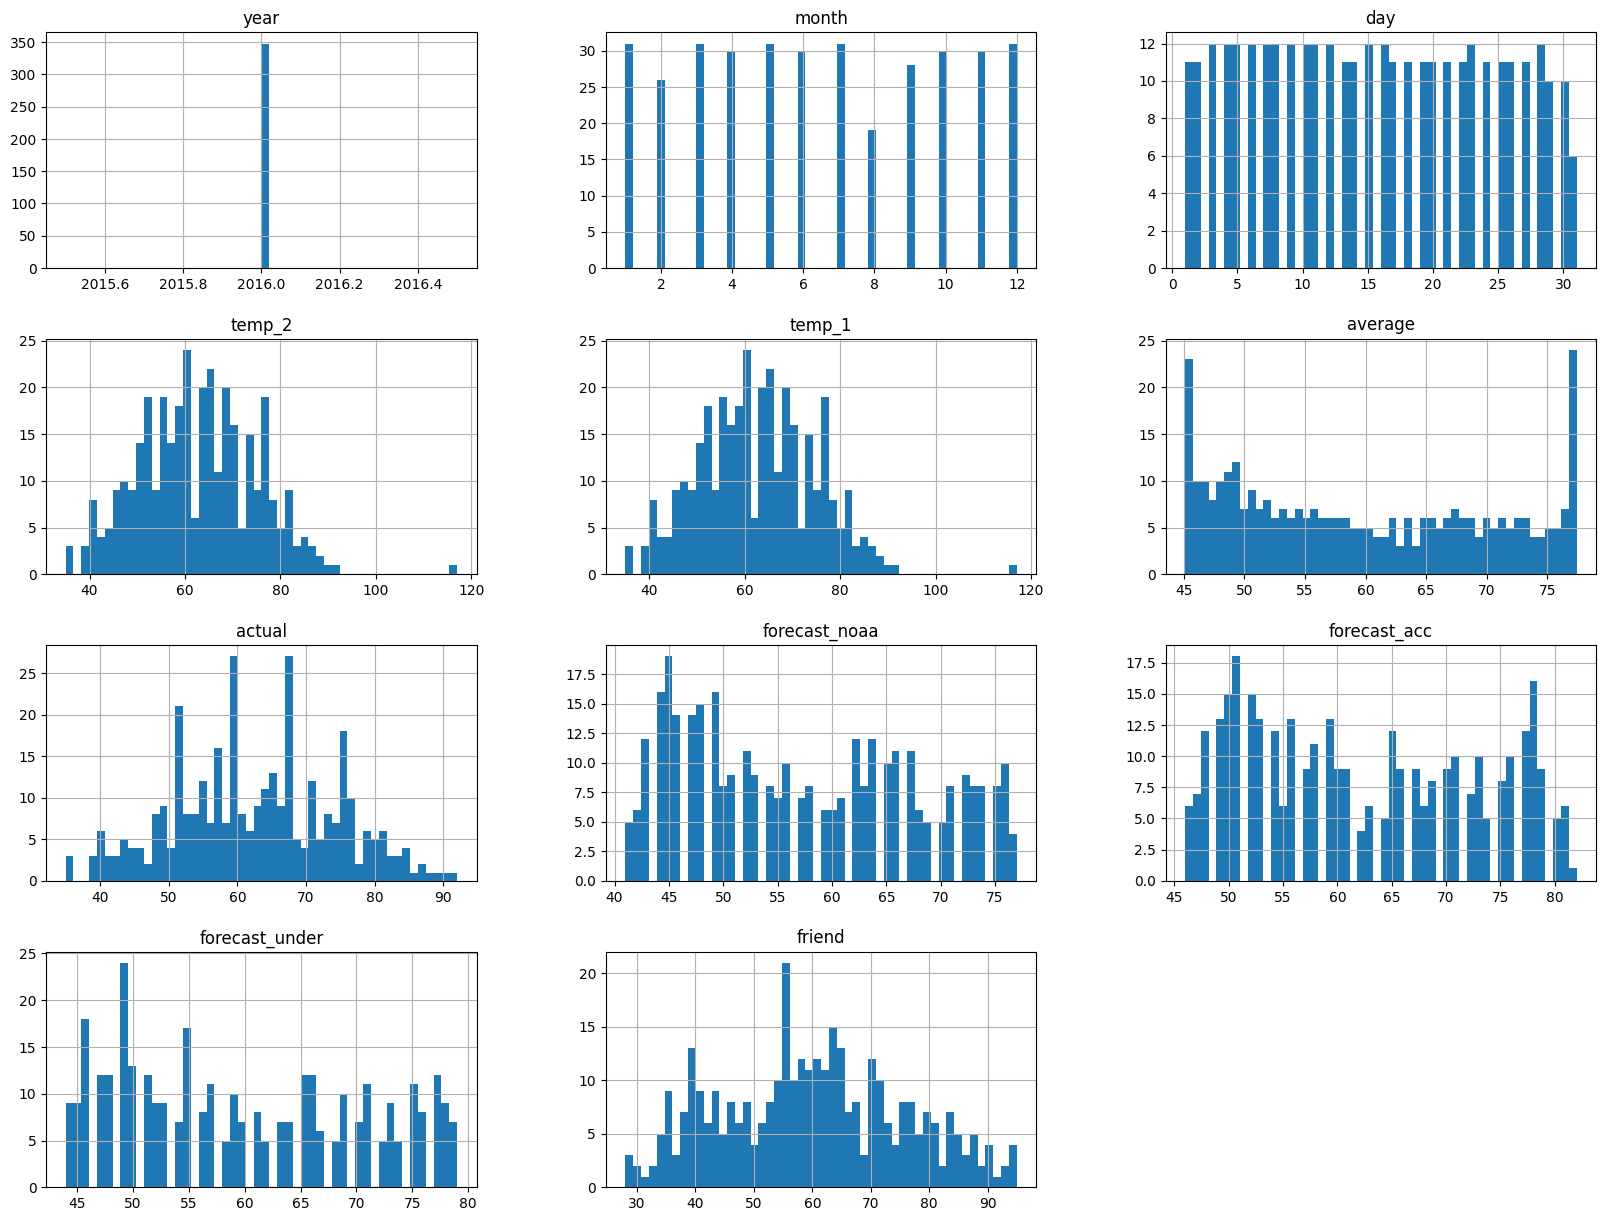

In [35]:
# agregar graficos histogramas
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

Probablemente punto de medición erronéo para 117°F, muy escapado de todas las demás mediciones.

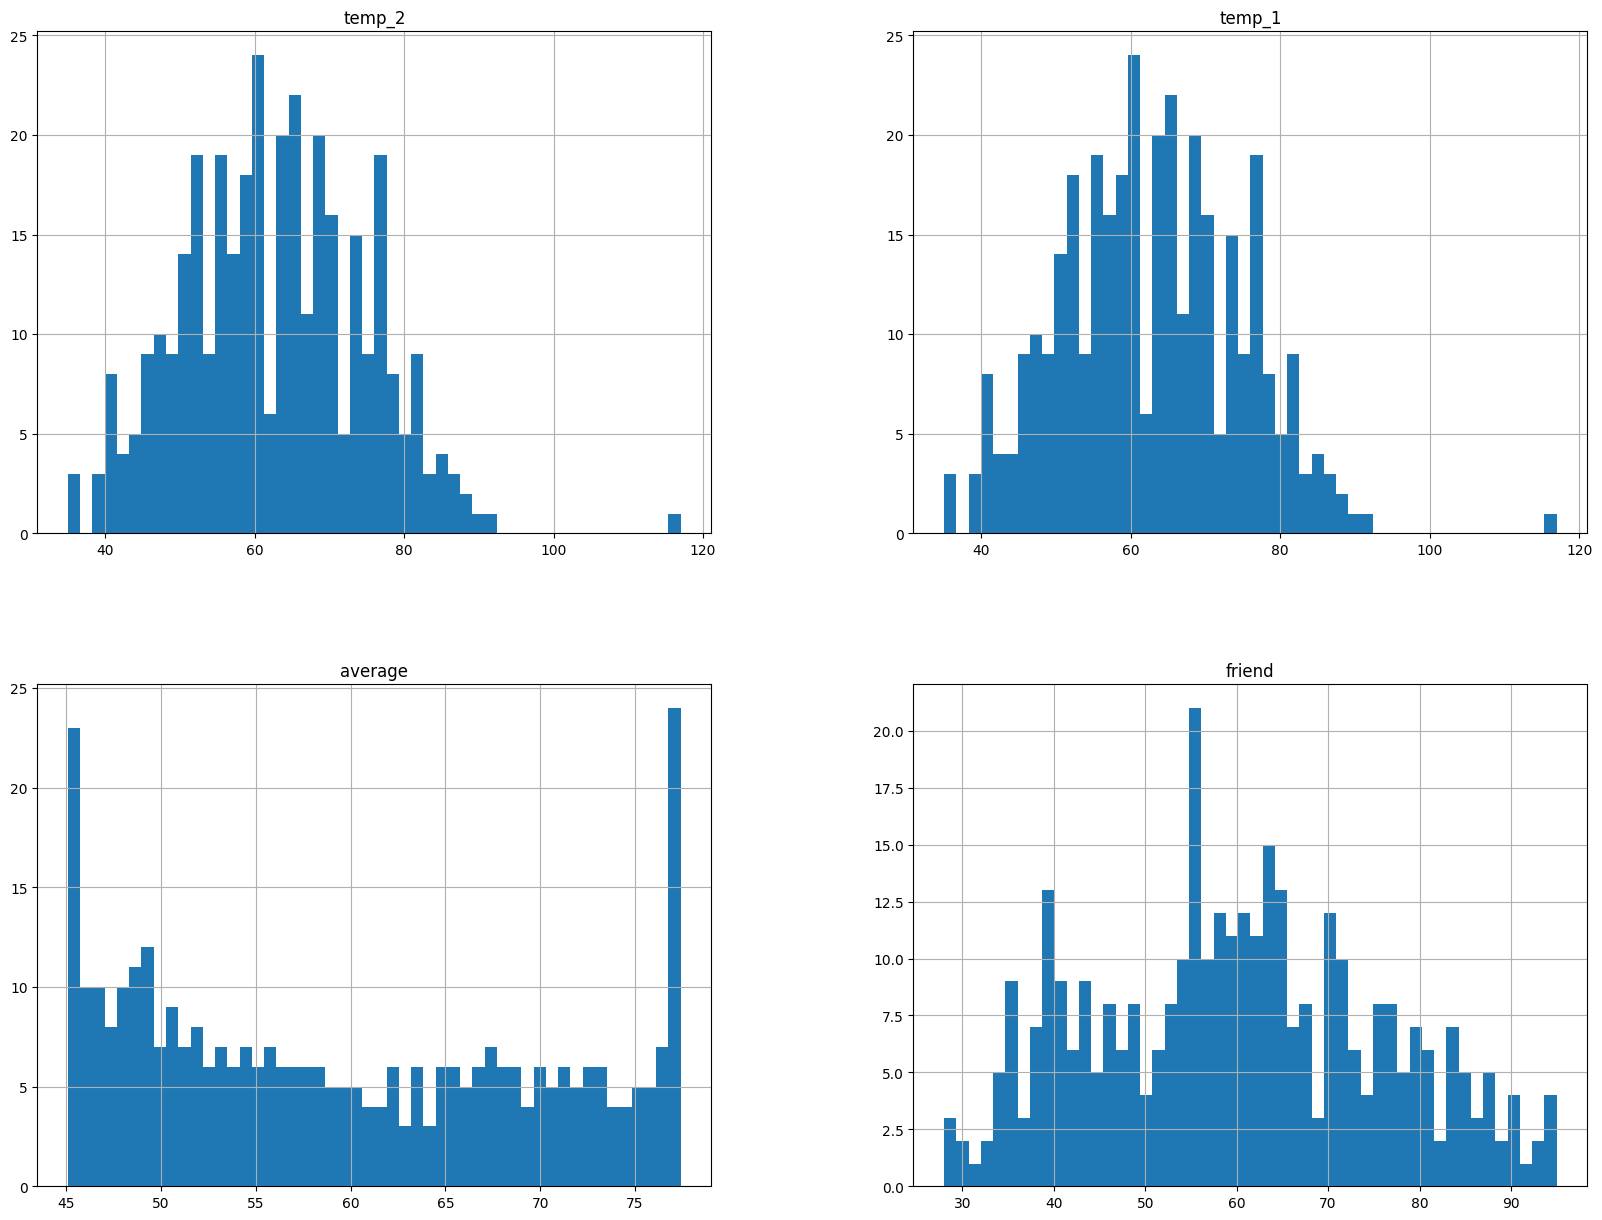

In [36]:
# agregar graficos histogramas
import matplotlib.pyplot as plt 
df.hist(column= ['temp_2', 'temp_1', 'average', 'friend'], bins=50, figsize=(20,15))
plt.show()

In [37]:
#Punto 3

df2 = df.drop(columns=['forecast_noaa', 'forecast_acc', 'forecast_under'])
df2.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [38]:
df3 = pd.get_dummies(df2, columns=['week'])
df3.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [39]:
#Punto 4

X = df3.drop('actual', axis=1)
y = df3['actual']

X = np.array(X)
y = np.array(y)

In [40]:
# Punto 5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

In [41]:
# Punto 6

baseline_prediction = np.full_like(y_test, np.mean(y_train))
baseline_mae = np.mean(np.abs(baseline_prediction - y_test))
print("Error promedio absoluto (MAE) de la línea de base:", baseline_mae)

Error promedio absoluto (MAE) de la línea de base: 9.586206896551724


In [42]:
# Punto 7

# Crear el modelo de Bosque Aleatorio
random_forest = RandomForestRegressor(n_estimators=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [44]:
# Punto 8

# Obtener las predicciones del modelo para los datos de prueba
predicciones = random_forest.predict(X_test)
predicciones


array([68.546, 60.784, 51.793, 60.927, 65.881, 70.528, 80.896, 78.619,
       62.719, 73.128, 63.602, 72.64 , 38.659, 62.429, 71.211, 56.202,
       60.822, 56.842, 57.348, 76.862, 64.103, 54.39 , 65.619, 62.349,
       58.085, 52.536, 67.117, 47.089, 61.673, 78.307, 73.671, 64.337,
       55.865, 80.073, 73.967, 61.824, 53.672, 50.83 , 68.275, 43.457,
       70.446, 57.512, 76.381, 42.691, 61.097, 73.52 , 52.555, 79.064,
       54.275, 42.529, 46.701, 42.727, 64.663, 65.748, 74.633, 61.44 ,
       55.451, 59.685, 53.377, 59.33 , 66.457, 50.433, 60.308, 70.522,
       59.998, 58.837, 71.399, 69.518, 75.912, 40.739, 78.394, 56.005,
       60.448, 49.8  , 54.326, 63.446, 43.876, 76.366, 48.199, 52.312,
       53.308, 68.748, 73.033, 73.27 , 63.059, 58.739, 46.929])

In [46]:
# Comparar las predicciones con los valores reales
for i in range(len(predicciones)):
    print("Predicción:", predicciones[i], " - Valor real:", y_test[i])

Predicción: 68.546  - Valor real: 66
Predicción: 60.784  - Valor real: 61
Predicción: 51.793  - Valor real: 52
Predicción: 60.927  - Valor real: 66
Predicción: 65.881  - Valor real: 70
Predicción: 70.528  - Valor real: 82
Predicción: 80.896  - Valor real: 85
Predicción: 78.619  - Valor real: 84
Predicción: 62.719  - Valor real: 65
Predicción: 73.128  - Valor real: 92
Predicción: 63.602  - Valor real: 61
Predicción: 72.64  - Valor real: 85
Predicción: 38.659  - Valor real: 44
Predicción: 62.429  - Valor real: 65
Predicción: 71.211  - Valor real: 69
Predicción: 56.202  - Valor real: 62
Predicción: 60.822  - Valor real: 64
Predicción: 56.842  - Valor real: 56
Predicción: 57.348  - Valor real: 53
Predicción: 76.862  - Valor real: 79
Predicción: 64.103  - Valor real: 63
Predicción: 54.39  - Valor real: 57
Predicción: 65.619  - Valor real: 67
Predicción: 62.349  - Valor real: 62
Predicción: 58.085  - Valor real: 59
Predicción: 52.536  - Valor real: 56
Predicción: 67.117  - Valor real: 65
Pre

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular el MAE
mae = mean_absolute_error(y_test, predicciones)

# Calcular el MSE
mse = mean_squared_error(y_test, predicciones)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Mostrar las métricas de precisión
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 3.834172413793103
MSE: 25.399714471264364
RMSE: 5.039812940106445


El modelo mejora los resultados de las predicciones, del orden del 50% respecto a la linea base generada en el punto 6, por lo tanto consideramos es adecuado.
Se observa desviación de alrededor de 4 a 5°F, sobre la media de 62°F de los datos a predecir, alrededor de +-7% de desviación.